In [1]:
from cube import solved_state, make_move

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [5]:
# Function to visualize the Cayley graph
def visualize_cayley_graph(generators, max_depth=10):
    G = nx.DiGraph()
    identity = tuple(solved_state[:])
    G.add_node(identity)
    
    states = {identity: 0}
    queue = [identity]
    
    while queue:
        current = queue.pop(0)
        depth = states[current]
        if depth < max_depth:
            for moves in generators:
                next_state = current[:]
                for move in moves.split(" "):
                    next_state = tuple(make_move(list(next_state), move))

                if next_state not in list(states.keys()):
                    states[next_state] = depth + 1
                    queue.append(next_state)
                    G.add_node(next_state)

                G.add_edge(current, next_state, label=moves)

    plt.figure(figsize=(10, 8))
                 
    # Use Kamada-Kawai layout for better readability
    pos = nx.kamada_kawai_layout(G)
    labels = {node: str(states[node]) for node in G.nodes}
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.9)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    # nx.draw_networkx_nodes(G, pos, nodelist=[center_node], node_size=1000, node_color='orange')
    
    plt.title(f'Cayley Graph of Subgroup Generated by {" and ".join(generators)} Moves', fontsize=30)
    plt.savefig(f'{" and ".join(generators)} Moves.png', bbox_inches='tight',dpi=400)
    plt.show()

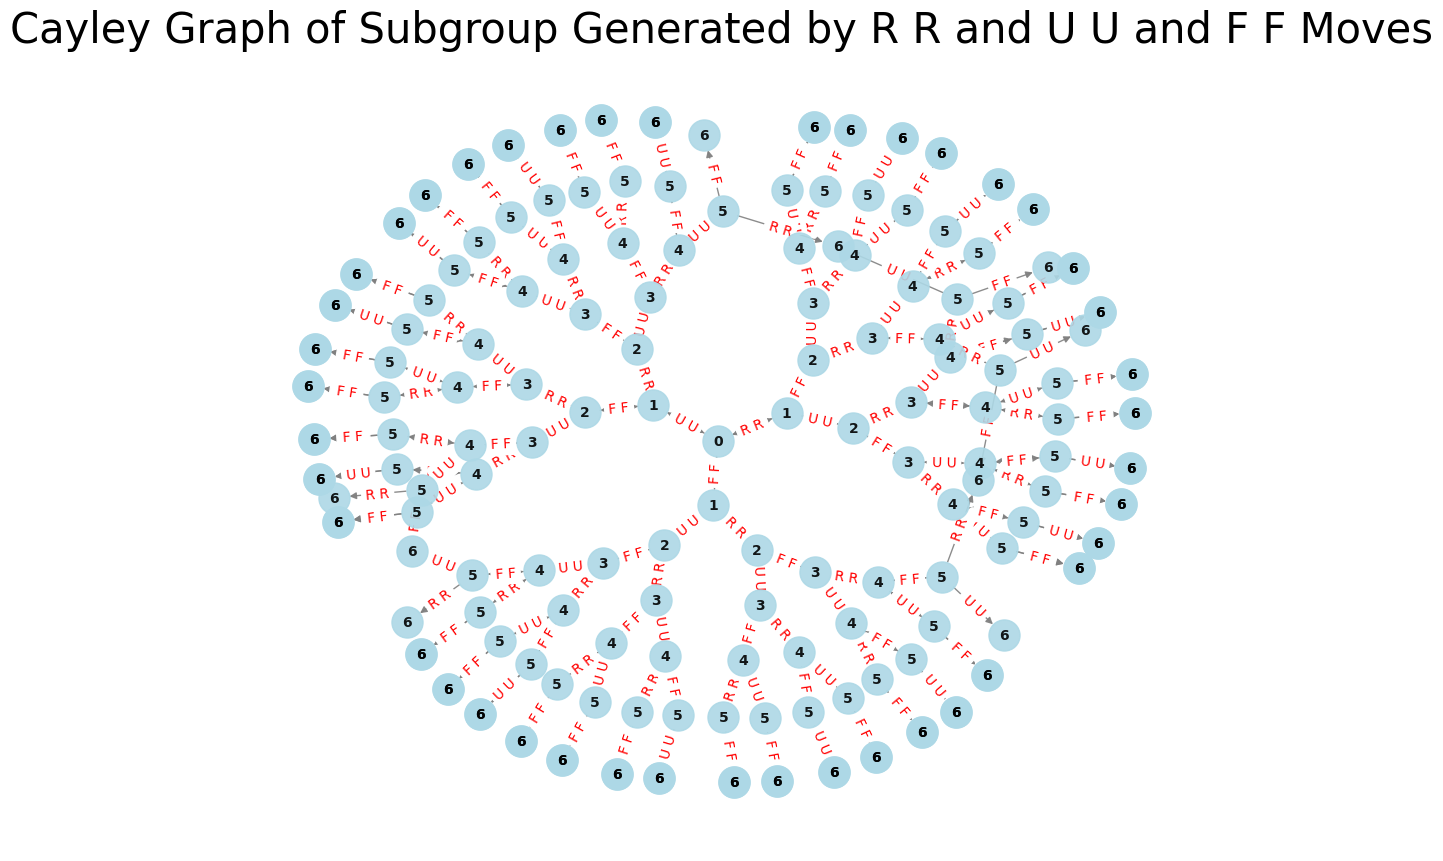

In [7]:
generators = ["R R", "U U", "F F"]

visualize_cayley_graph(generators, max_depth=6)